In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
save_dir = './Desktop/Insight Project/Data/retail_all/farm_price/prediction/'

In [48]:
commodities = ['broccoli','carrot','cauliflower','lettuce_romaine','spinach']

In [49]:
def read_csv_sort(productname):
    input_data = pd.read_csv('./Desktop/Insight Project/Data/retail_all/farm_price/farm_price_'+productname+'.csv')
    
    # Date to Index
    input_data.index = input_data["Year"]
    del input_data["Year"]
    
    # Year format
    pd.to_datetime(input_data.index, format='%Y')
    # Sort index by date order
    output_data = input_data.sort_index()
    
    output_data = output_data[['Value']]
    
    return output_data

In [50]:
# Test def read_csv_sort
df = read_csv_sort('spinach')
df.head()

,Value
Year,
1997,31.3
1998,35.8
1999,32.1
2000,31.8
2001,32.4


In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [52]:
y = df['Value'].values
X = df.index.values

In [53]:
X

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [54]:
# Reshape your data either X.reshape(-1, 1) if your data has a single feature/column and X.reshape(1, -1) if it contains a single sample.
X = X.reshape(-1, 1)

In [55]:
model = LinearRegression().fit(X, y)
m = model.coef_[0]
b = model.intercept_
# equation of the line
#print 'y = ', round(m[0],2), 'x + ', round(b[0],2)

In [56]:
predictions = model.predict(X)
predictions

array([24.57944664, 25.9796725 , 27.37989836, 28.78012422, 30.18035008,
       31.58057595, 32.98080181, 34.38102767, 35.78125353, 37.18147939,
       38.58170525, 39.98193111, 41.38215697, 42.78238283, 44.1826087 ,
       45.58283456, 46.98306042, 48.38328628, 49.78351214, 51.183738  ,
       52.58396386, 53.98418972])

In [57]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6210808490226158


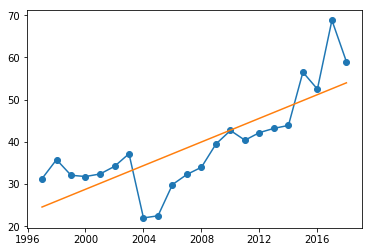

In [58]:
datelist = pd.to_datetime(df.index, format='%Y')
plt.plot_date(datelist, y, '-o')
plt.plot_date(datelist, predictions, '-')

In [59]:
test_stats = []
product = 'spinach'
current_price = df.at[2018,'Value']
# precict 2019 price
new_X = [[2019]]
next_year_price = model.predict(new_X)
one_year_prediction = next_year_price[0]

In [61]:
next_year_price[0]

55.38441558441582

In [68]:
pred_X = [[2000],[2001],[2002],[2003],[2004],[2005],[2006],[2007]]
model.predict(pred_X)

array([28.78012422, 30.18035008, 31.58057595, 32.98080181, 34.38102767,
       35.78125353, 37.18147939, 38.58170525])

In [14]:
test_stats.append([product, current_price, one_year_prediction])

In [15]:
df_pred = pd.DataFrame(test_stats, columns=['Item', 'Current Price', 'One Year Prediction'])
df_pred.head()

,Item,Current Price,One Year Prediction
0,spinach,59.0,55.384416


In [16]:
df_pred.to_csv(save_dir+'farm_price_predictions.csv')

In [17]:
# prophet by Facebook
import fbprophet as fp
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [18]:
df2 = df
pd.to_datetime(df.index, format='%Y')
df2

,Value
Year,
1997,31.3
1998,35.8
1999,32.1
2000,31.8
2001,32.4
2002,34.2
2003,37.2
2004,22.0
2005,22.5


In [19]:
# Date will become a normal column and you can rename it.
df2 = df.reset_index()
df2.head()

,Year,Value
0,1997,31.3
1,1998,35.8
2,1999,32.1
3,2000,31.8
4,2001,32.4


In [20]:
# from the prophet documentation every variables should have specific names
df2 = df2.rename(columns = {'Year': 'ds',
                                'Value': 'y'})
df2.head()

,ds,y
0,1997,31.3
1,1998,35.8
2,1999,32.1
3,2000,31.8
4,2001,32.4


In [21]:
m = fp.Prophet(weekly_seasonality=False, daily_seasonality=False)
m.fit(df2)

INFO:fbprophet:n_changepoints greater than number of observations.Using 16.
C:\Users\hyung\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [31]:
future = m.make_future_dataframe(periods=19000)
future.tail()

,ds
19017,2022-01-04 00:00:00.000002018
19018,2022-01-05 00:00:00.000002018
19019,2022-01-06 00:00:00.000002018
19020,2022-01-07 00:00:00.000002018
19021,2022-01-08 00:00:00.000002018


In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
19017,2022-01-04 00:00:00.000002018,45.716566,36.829685,54.431459
19018,2022-01-05 00:00:00.000002018,28.950219,19.603333,37.665652
19019,2022-01-06 00:00:00.000002018,6.958541,-2.235269,14.757097
19020,2022-01-07 00:00:00.000002018,-19.612122,-28.565991,-11.290320
19021,2022-01-08 00:00:00.000002018,-49.989955,-58.485091,-41.214520


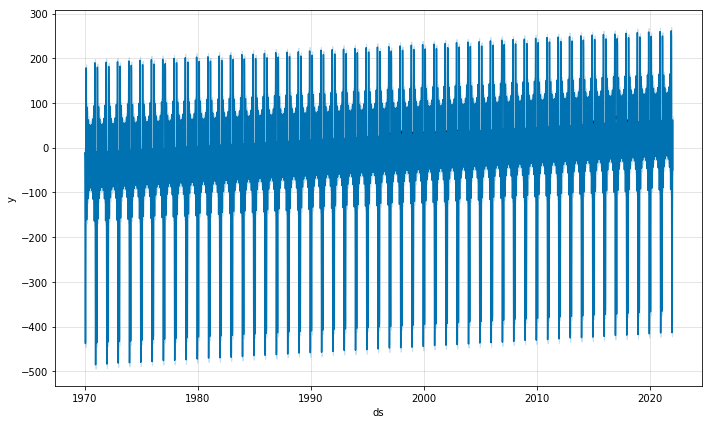

In [33]:
fig1 = m.plot(forecast)

# ARIMA test

In [46]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from statsmodels.tsa.arima_model import ARIMA

In [36]:
# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\hyung\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\hyung\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                   21
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -67.224
Method:                       css-mle   S.D. of innovations              5.906
Date:                Fri, 21 Jun 2019   AIC                            148.447
Time:                        23:38:24   BIC                            155.759
Sample:                             1   HQIC                           150.034
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4490      0.907      1.598      0.131      -0.329       3.227
ar.L1.D.Value    -0.3919      0.215     -1.825      0.088      -0.813       0.029
ar.L2.D.Value     0.0422      0.260     

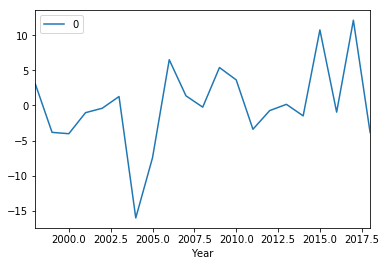

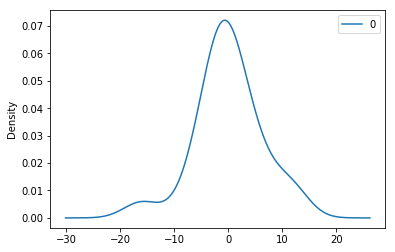

In [39]:
# plot residual errors
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (22,) and (21,)

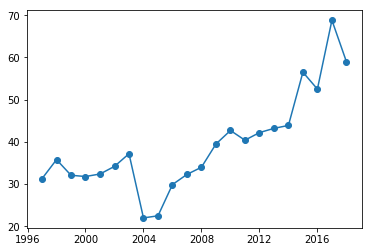

In [41]:
datelist = pd.to_datetime(df.index, format='%Y')
plt.plot_date(datelist, y, '-o')
plt.plot_date(datelist, model_fit.resid, '-')

predicted=41.769318, expected=40.400000
predicted=40.153049, expected=42.200000
predicted=43.703527, expected=43.200000
predicted=43.294888, expected=43.900000
predicted=44.771017, expected=56.500000
predicted=57.235262, expected=52.500000
predicted=50.120696, expected=68.800000
predicted=66.374803, expected=59.000000
Test MSE: 71.248


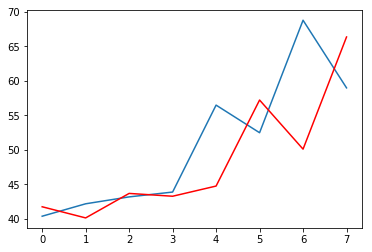

In [45]:
from sklearn.metrics import mean_squared_error
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()